# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [80]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [81]:
X, y = wine.data, wine.target

In [82]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [83]:
wine_df.shape

(178, 14)

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [85]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
# silhouette score:

silhouette_score(X, kmeans.labels_, metric='sqeuclidean')

0.7185151416671582

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [87]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
# silhouette score:

silhouette_score(X, kmeans.labels_, metric='sqeuclidean')

0.7136229487543864

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [89]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
# silhouette score:

silhouette_score(X, kmeans.labels_, metric='sqeuclidean')

0.7322991109041611

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [91]:
from yellowbrick.cluster import KElbowVisualizer


In [92]:
def elbow (n_cluster, metric):
    
    
    KElbow_viz= KElbowVisualizer(KMeans(n_clusters=n_cluster), k=(2,12), 
                                        metric = metric)
    KElbow_viz.fit(X) 
    print('clusters: ', n_cluster)
    print('metric: ', metric)
    KElbow_viz.show()                

In [93]:
clusters = [3,5,8]
metrics = ['distortion', 'silhouette', 'calinski_harabasz']

clusters:  3
metric:  distortion


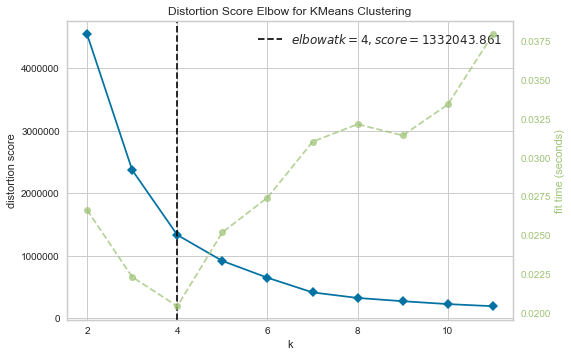

clusters:  5
metric:  distortion


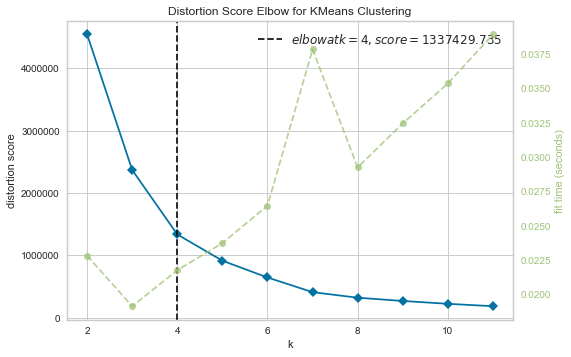

clusters:  8
metric:  distortion


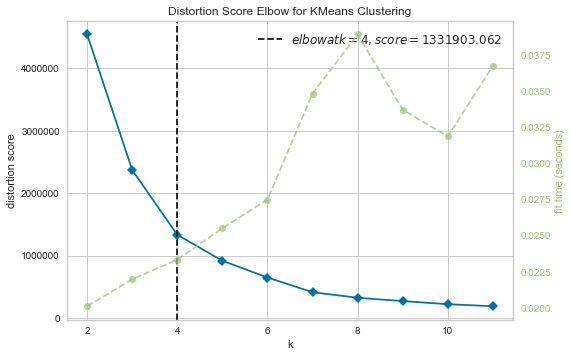

clusters:  3
metric:  silhouette


/Users/plopezbar/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/plopezbar/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/plopezbar/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


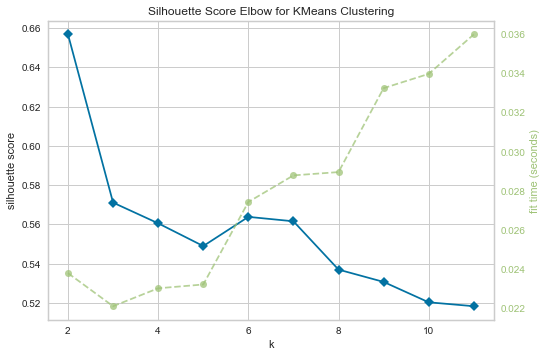

clusters:  5
metric:  silhouette


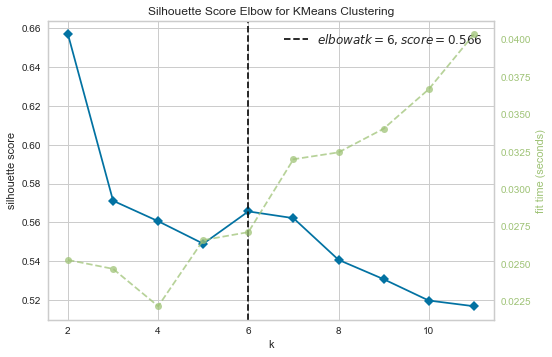

clusters:  8
metric:  silhouette


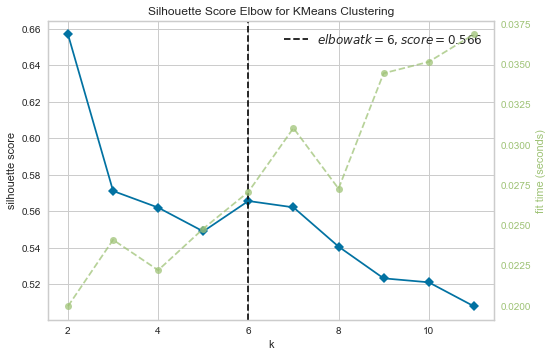

clusters:  3
metric:  calinski_harabasz


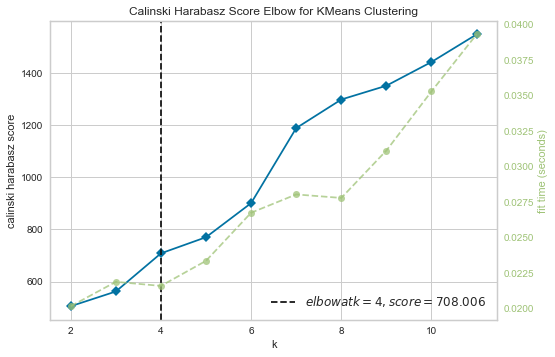

clusters:  5
metric:  calinski_harabasz


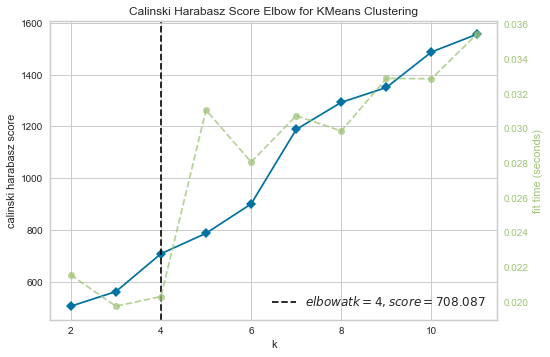

clusters:  8
metric:  calinski_harabasz


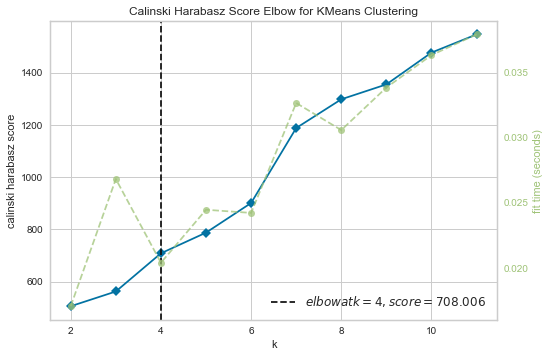

In [94]:
for x in metrics:
    for i in clusters:
        elbow(i,x)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [96]:
def elbow2 (n_cluster, metric):
    
    
    KElbow_viz= KElbowVisualizer(AgglomerativeClustering(n_clusters=n_cluster), k=(2,12), 
                                        metric = metric)
    KElbow_viz.fit(X) 
    print('clusters: ', n_cluster)
    print('metric: ', metric)
    KElbow_viz.show()  

clusters:  3
metric:  distortion


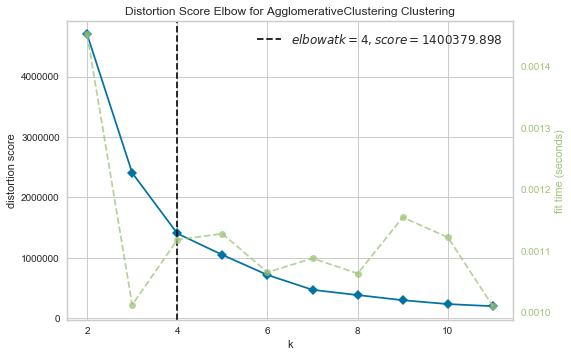

clusters:  5
metric:  distortion


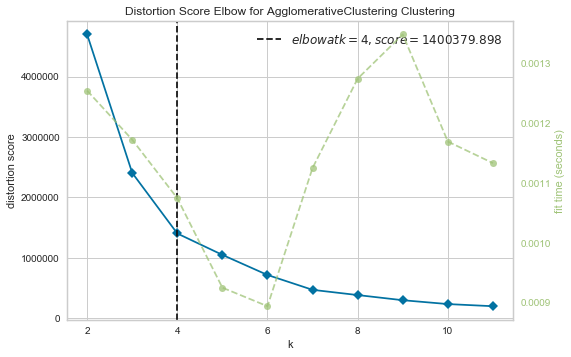

clusters:  8
metric:  distortion


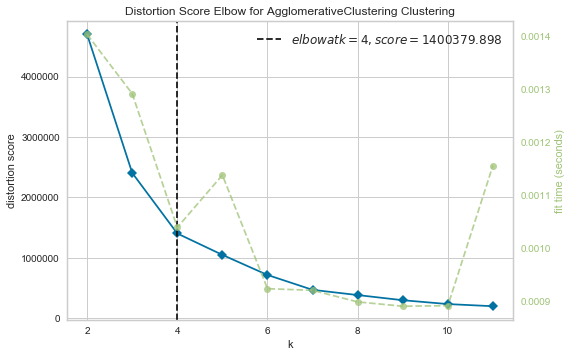

clusters:  3
metric:  silhouette


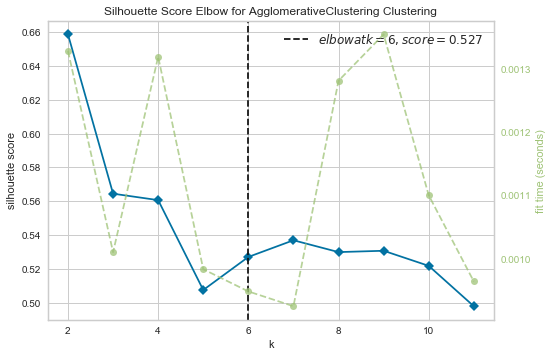

clusters:  5
metric:  silhouette


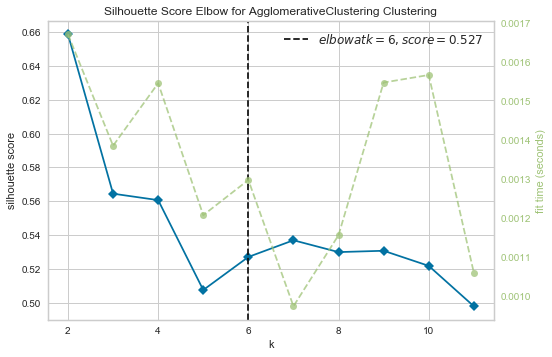

clusters:  8
metric:  silhouette


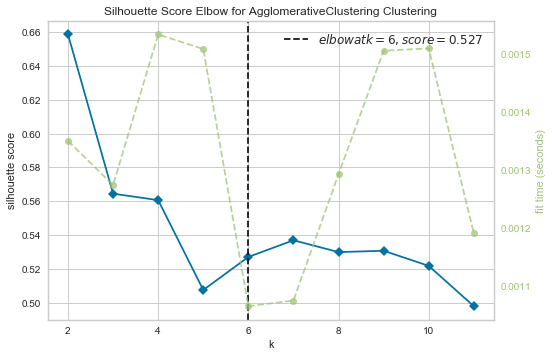

clusters:  3
metric:  calinski_harabasz


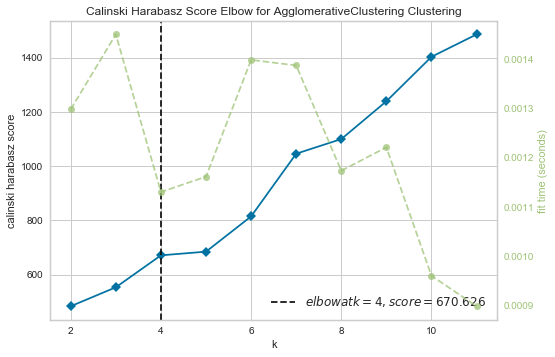

clusters:  5
metric:  calinski_harabasz


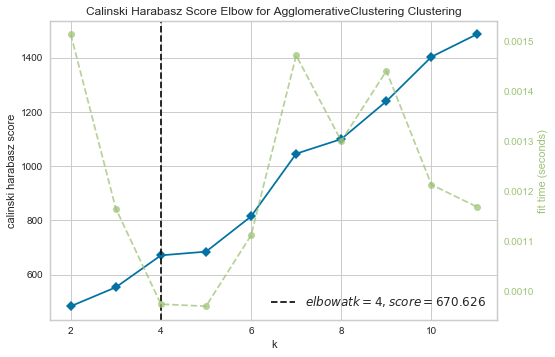

clusters:  8
metric:  calinski_harabasz


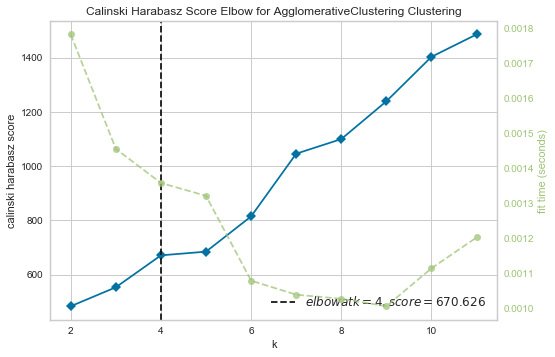

In [97]:
for x in metrics:
    for i in clusters:
        elbow2(i,x)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [103]:
import seaborn as sns

bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']

In [99]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [100]:
wine_df = wine_df.drop('target', axis=1)
wine_df['labels'] = kmeans.labels_

In [102]:
wine_df.labels.value_counts()

2    69
0    62
1    47
Name: labels, dtype: int64

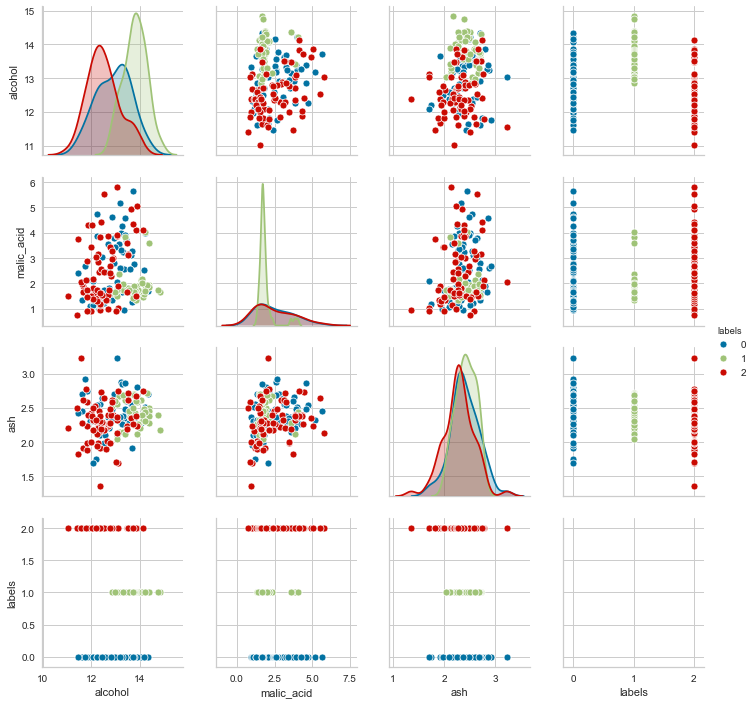

In [105]:
# Bin 1:
_=sns.pairplot(wine_df[bin1], hue='labels')

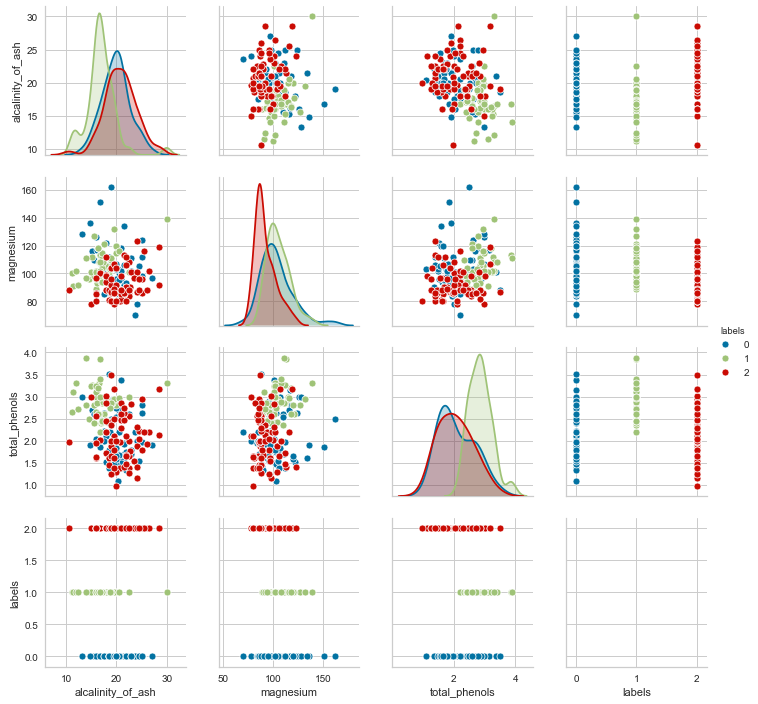

In [109]:
# Bin 2:
_=sns.pairplot(wine_df[bin2], hue='labels')

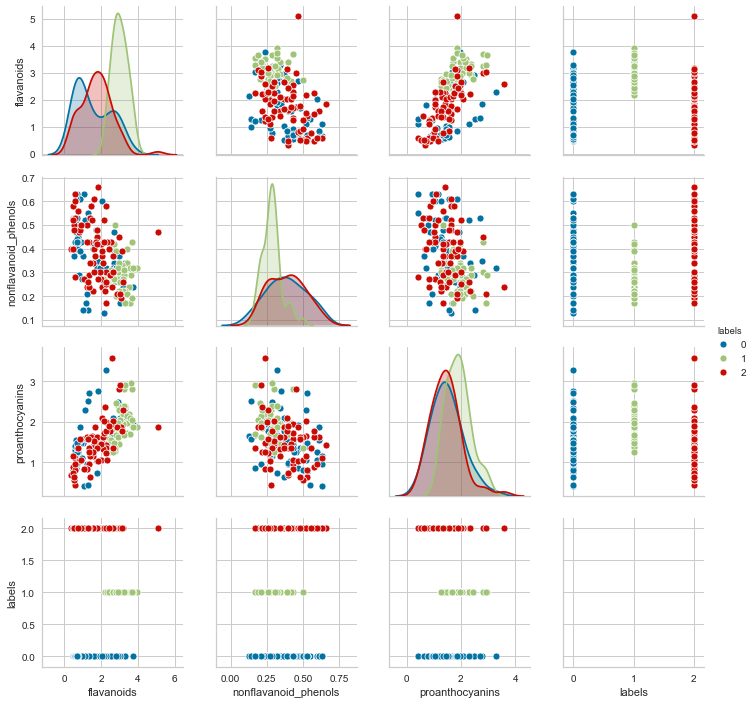

In [107]:
# Bin 3:
_=sns.pairplot(wine_df[bin3], hue='labels')

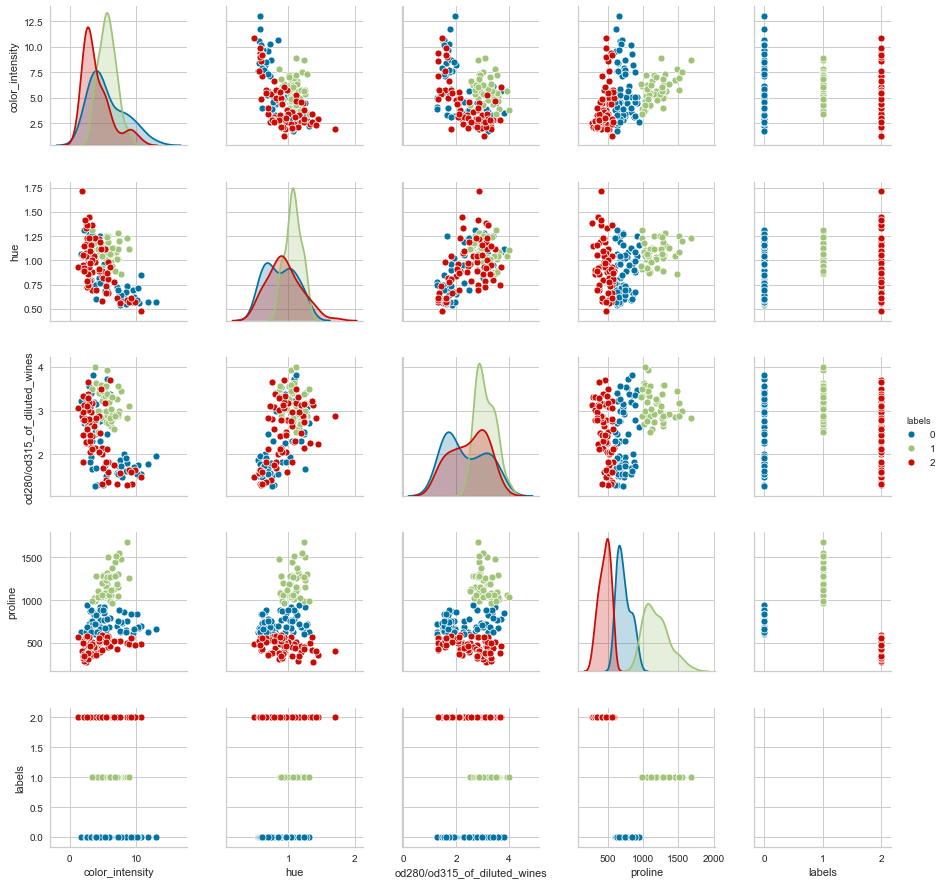

In [108]:
# Bin 4:
_=sns.pairplot(wine_df[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [118]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(2).fit_transform(X_scaled)

wine_df_pca = pd.DataFrame(pca, columns=['component1', 'component2'])
wine_df_pca['labels'] = kmeans.labels_
wine_df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
component1    178 non-null float64
component2    178 non-null float64
labels        178 non-null int32
dtypes: float64(2), int32(1)
memory usage: 3.6 KB


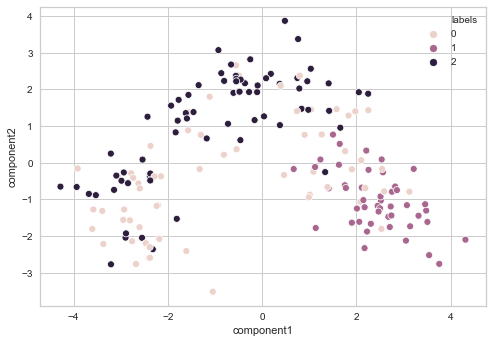

In [117]:
sns.scatterplot(data=wine_df_pca, x='component1', y='component2', hue='labels')